In [1]:
#GENERAL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#PATH PROCESS
import os
from pathlib import Path
import glob
from scipy.io import loadmat

# image processing
import cv2
from scipy.ndimage import gaussian_filter

# Neural Network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision

In [2]:
import cv2
import albumentations as A
import numpy as np
import os

def add_rain(image):
    # Apply rain effect using Albumentations
    transform = A.Compose([
        A.RandomRain(
            p=1.0,                       # Probability of applying the effect
            rain_type='heavy',            # Increase the rain intensity to 'heavy'
            brightness_coefficient=0.8,   # Slightly reduce brightness for a more realistic effect
            drop_length=8,                # Increase rain drop length for a heavier rain effect
            drop_width=2                  # Increase drop width for thicker rain drops
        )
    ])
    augmented = transform(image=image)
    return augmented['image']

def process_images(input_folder, output_folder):
    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop through all the images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Construct the full image path
            image_path = os.path.join(input_folder, filename)
            
            # Load the image
            image = cv2.imread(image_path)
            
            # Optionally resize the image for better quality rain effect (increase resolution)
            height, width = image.shape[:2]
            image_resized = cv2.resize(image, (width*2, height*2), interpolation=cv2.INTER_LINEAR)
            
            # Add rain effect
            image_with_rain = add_rain(image_resized)
            
            # Optional post-processing (Sharpen the image after applying rain)
            kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
            sharpened_image = cv2.filter2D(image_with_rain, -1, kernel)
            
            # Resize back to original size
            final_image = cv2.resize(sharpened_image, (width, height), interpolation=cv2.INTER_LINEAR)
            
            # Save the result in the output folder with the same filename
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, final_image)
            #print(f"Processed and saved: {output_path}")

# Specify the input folder and the output folder
input_folder = '/kaggle/input/shanghaitech/ShanghaiTech/part_A/test_data/images/'  # Update with your input folder path
output_folder = '/kaggle/working/part_A/test_data/images/'           # Update with your output folder path

# Process all images in the folder
process_images(input_folder, output_folder)


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
import shutil
import os

# Define the source and destination paths
source_folder = '/kaggle/input/shanghaitech/ShanghaiTech/part_A/test_data/ground-truth/'  # Replace with your actual input folder path
destination_folder = '/kaggle/working/part_A/test_data/ground-truth/'  # Replace with your desired output folder path

# Check if the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the entire directory
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

print(f"Folder copied from {source_folder} to {destination_folder}")


Folder copied from /kaggle/input/shanghaitech/ShanghaiTech/part_A/test_data/ground-truth/ to /kaggle/working/part_A/test_data/ground-truth/


In [4]:
import cv2
import albumentations as A
import numpy as np
import os

def add_rain(image):
    # Apply rain effect using Albumentations
    transform = A.Compose([
        A.RandomRain(
            p=1.0,                       # Probability of applying the effect
            rain_type='heavy',            # Increase the rain intensity to 'heavy'
            brightness_coefficient=0.9,   # Slightly reduce brightness for a more realistic effect
            drop_length=8,                # Increase rain drop length for a heavier rain effect
            drop_width=2                # Increase drop width for thicker rain drops
        )
    ])
    augmented = transform(image=image)
    return augmented['image']

def process_images(input_folder, output_folder):
    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop through all the images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Construct the full image path
            image_path = os.path.join(input_folder, filename)
            
            # Load the image
            image = cv2.imread(image_path)
            
            # Optionally resize the image for better quality rain effect (increase resolution)
            height, width = image.shape[:2]
            image_resized = cv2.resize(image, (width*2, height*2), interpolation=cv2.INTER_LINEAR)
            
            # Add rain effect
            image_with_rain = add_rain(image_resized)
            
            # Optional post-processing (Sharpen the image after applying rain)
            kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
            sharpened_image = cv2.filter2D(image_with_rain, -1, kernel)
            
            # Resize back to original size
            final_image = cv2.resize(sharpened_image, (width, height), interpolation=cv2.INTER_LINEAR)
            
            # Save the result in the output folder with the same filename
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, final_image)
            #print(f"Processed and saved: {output_path}")

# Specify the input folder and the output folder
input_folder = '/kaggle/input/shanghaitech/ShanghaiTech/part_A/train_data/images/'  # Update with your input folder path
output_folder = '/kaggle/working/part_A/train_data/images/'           # Update with your output folder path

# Process all images in the folder
process_images(input_folder, output_folder)


In [5]:
import shutil
import os

# Define the source and destination paths
source_folder = '/kaggle/input/shanghaitech/ShanghaiTech/part_A/train_data/ground-truth/'  # Replace with your actual input folder path
destination_folder = '/kaggle/working/part_A/train_data/ground-truth/'  # Replace with your desired output folder path

# Check if the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the entire directory
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

print(f"Folder copied from {source_folder} to {destination_folder}")


Folder copied from /kaggle/input/shanghaitech/ShanghaiTech/part_A/train_data/ground-truth/ to /kaggle/working/part_A/train_data/ground-truth/


# Exploring Dataset

Take one example to explore the structure of dataset

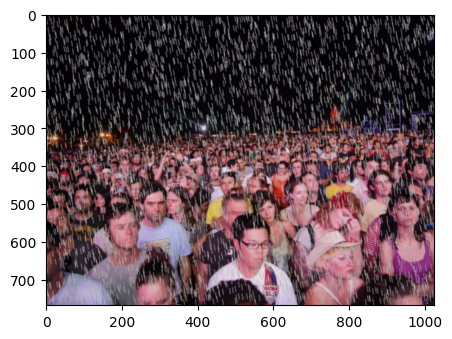

In [6]:
path_img_ex = '/kaggle/working/part_A/train_data/images/IMG_6.jpg'
image_ex = cv2.cvtColor(cv2.imread(path_img_ex),cv2.COLOR_BGR2RGB)
figure = plt.figure(figsize=(5,5))
plt.imshow(image_ex)
plt.show()

In [7]:
path_gt_ex = "/kaggle/working/part_A/train_data/ground-truth/GT_IMG_6.mat"
gt_ex = loadmat(path_gt_ex)
print('type: ', type(gt_ex))
print(gt_ex.items())

type:  <class 'dict'>
dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 18 20:06:15 2016'), ('__version__', '1.0'), ('__globals__', []), ('image_info', array([[array([[(array([[   9.00940439,  644.82791619],
                       [  38.27982181,  548.65368751],
                       [ 212.50849695,  558.41049332],
                       ...,
                       [1016.63190893,  316.92954958],
                       [1016.98036628,  297.41593796],
                       [1006.64279822,  309.43771655]]), array([[554]], dtype=uint16))]],
              dtype=[('location', 'O'), ('number', 'O')])                                ]],
      dtype=object))])


In [8]:
print(gt_ex.keys())

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])


In [9]:
gt_coor_ex = gt_ex.get('image_info')[0][0][0][0][0]
print('Shape of coordinates: ', gt_coor_ex.shape)
#print(gt_coor_ex)


Shape of coordinates:  (554, 2)


The keyword 'image_info' gives the coordinates of location of each person in the image.

The shape[0] indicates the amount of people in the image.

Text(0.5, 1.0, 'Image and Coordinate')

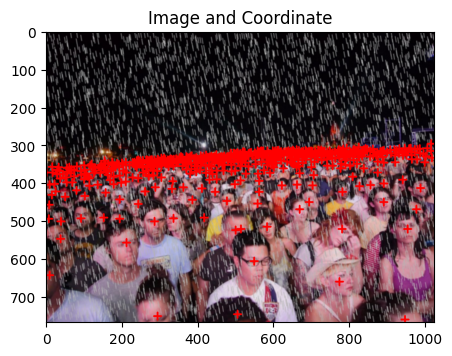

In [10]:
figure = plt.figure(figsize=(5,5))

for x_cor, y_cor in gt_coor_ex:
    cv2.drawMarker(image_ex, (int(x_cor), int(y_cor)),(255, 0, 0),thickness=3)

plt.imshow(image_ex)
plt.title("Image and Coordinate")

Extract the coordinate as density map. With the function *create_density_map*, the coordinate of people can be visulized, the sum of the density map is the amount of people in the image, the size of the density map is the same as the image.

The density map will be used as 'label' for neural network.

In [11]:
def gen_density_map_gaussian(image, coords, sigma=5):
    img_zeros = np.zeros((image.shape[:2]), dtype=np.float32)
    for x_cor, y_cor in coords:
        img_zeros[int(y_cor), int(x_cor)] = 1

    density_map = gaussian_filter(img_zeros,sigma=sigma,truncate=5*5)

    return density_map

max1 :  tensor(1.)
max2 :  0.04156881
min1 :  tensor(0.)
min2 :  0.0


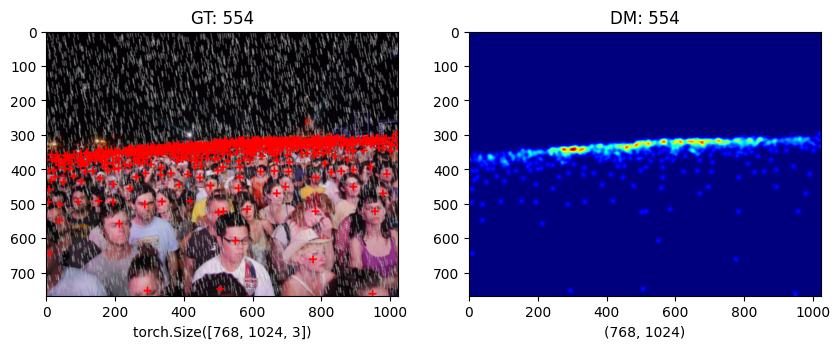

In [12]:
density_map_ex = gen_density_map_gaussian(image_ex, gt_coor_ex, 5)

figure = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
image_ex = torch.tensor(image_ex/255, dtype=torch.float)
plt.xlabel(image_ex.shape)
plt.title('GT: '+str(gt_coor_ex.shape[0]))
plt.imshow(image_ex)

plt.subplot(1,2,2)
plt.xlabel(density_map_ex.shape)
plt.title('DM: '+str(round(np.sum(density_map_ex))))
plt.imshow(density_map_ex, cmap="jet")

print('max1 : ', image_ex.max())
print('max2 : ', density_map_ex.max())
print('min1 : ', image_ex.min())
print('min2 : ', density_map_ex.min())

# Load Data

Create a data loader extract the key 'image_info' in MAT to obtain the coordinates of people location. Then use the *gen_density_map_gaussian* to create the density map of each image. In addition, take the dimension of the coordinate matrix as number of people, which can be used for model loss function. Downsample is applied in order to fit the shape of density map at output of training model.

In [13]:
class DataLoader(Dataset):
    def __init__(self, root_dir, gt_downsample=4,target_size=(224, 224),shuffle=False):
        self.root_dir = root_dir
        self.gt_downsample = gt_downsample
        self.shuffle = shuffle
        self.target_size = target_size

        self.img_names = [filename for filename in os.listdir(os.path.join(root_dir, 'images')) if filename.endswith('.jpg')]

        if self.shuffle:
            random.shuffle(self.img_names)

        self.n_people = {}
        self.DMs = {}
        for image_filename in self.img_names:
            img_path = os.path.join(root_dir, 'images', image_filename)
            GT_filename = 'GT_' + image_filename.split('.')[0] + '.mat'
            path_GT = os.path.join(root_dir, 'ground-truth', GT_filename)
            GT = loadmat(path_GT).get('image_info')[0][0][0][0][0]
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            self.DMs[img_path] = gen_density_map_gaussian(img, GT, 5)
            self.n_people[img_path] = GT.shape[0]


    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, 'images', self.img_names[index])  # Include the directory path
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        gt_density_map = self.DMs[img_path]
        gt_n_people = self.n_people[img_path]

        if len(img.shape) == 2: # expand grayscale image to three channel.
            img = img[:, :, np.newaxis]
            img = np.concatenate((img, img, img), 2)
        
        img = cv2.resize(img, self.target_size)

        # Resize the density map to the target size while preserving the total sum
        orig_shape = gt_density_map.shape
        gt_density_map = cv2.resize(gt_density_map, self.target_size)
        scaling_factor = (orig_shape[0] / self.target_size[0]) * (orig_shape[1] / self.target_size[1])
        gt_density_map = gt_density_map * scaling_factor  # Adjust the density map by the scaling factor

        gt_density_map = gt_density_map[np.newaxis, :, :]  # add channel dimension

        img = img.transpose((2, 0, 1))  # convert to order (channel, rows, cols)
        img_tensor = torch.tensor(img / 255, dtype=torch.float)
        dm_tensor = torch.tensor(gt_density_map, dtype=torch.float)

        return img_tensor, dm_tensor, gt_n_people



In [14]:
root_dir = "/kaggle/working/part_A/test_data/"
dataset = DataLoader(root_dir, gt_downsample=4, shuffle=True)

Print some samples of dataset as a sanity check

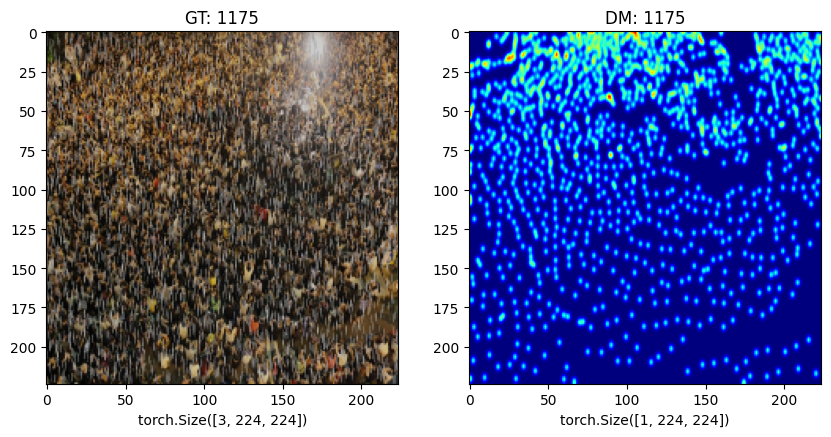

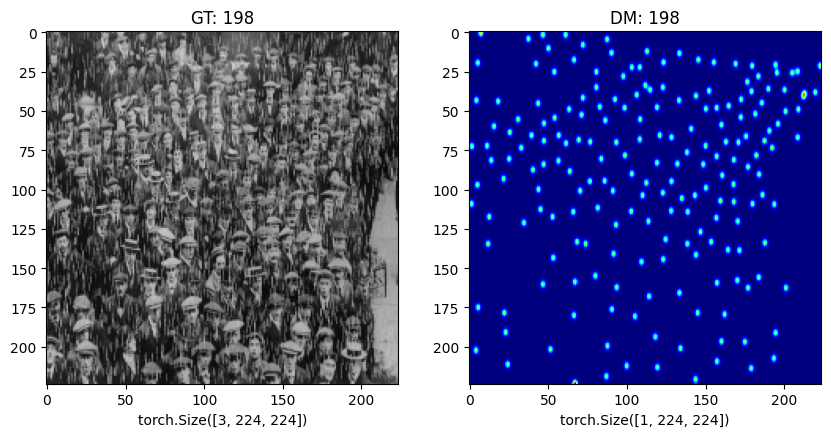

In [15]:
for i, (img, gt_dmap, n_people) in enumerate(dataset):
  plt.figure(figsize=(10, 5))
  plt.subplot(1,2,1)
  plt.xlabel(img.shape)
  plt.title('GT: ' + str(n_people))
  plt.imshow(img.permute(1, 2, 0))

  plt.subplot(1,2,2)
  plt.xlabel(gt_dmap.shape)
  plt.title('DM: ' + str(round(np.sum(gt_dmap.numpy()))))
  plt.imshow(gt_dmap.permute(1, 2, 0), cmap="jet")
  plt.show()

  if i > 0:
    #print('type of img: ', type(img))
    #print('type of dmap: ', type(gt_dmap))
    #print('shape of img: ', img.shape)
    break


# Create Model for Neural Network

Build a multi-column convolutional neural network for density map prediction.

The multi-column CNN consists of multiple parallel CNN columns, each processing the input data independently and at different resolutions. In the proposed architecture, the 1st column is with lowest resolution (with largest kernel size), and lowest depth; 2nd column has incresing resolution (smaller kernel size), and larger depth, and so on.

Each CNN column learns to extract features that contains different aspects from the input data. After feature extraction, the outputs from the all CNN columns are combined by concatenation. The combined features are passed through a single convolutional layer to generate the final output.

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        batch, channels, _, _ = x.size()
        se = self.global_avg_pool(x).view(batch, channels)  # Global pooling
        se = self.fc(se).view(batch, channels, 1, 1)  # Channel-wise weights
        return x * se  # Scale feature maps

class MC_CNN(nn.Module):
    def __init__(self, input_size=224):
        super().__init__()

        self.column1 = nn.Sequential(
            nn.Conv2d(3, 8, 9, padding=4),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Conv2d(8, 16, 7, padding=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 32, 7, padding=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 16, 7, padding=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 8, 7, padding=3),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            SEBlock(8)
        )

        self.column2 = nn.Sequential(
            nn.Conv2d(3, 10, 7, padding=3),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.Conv2d(10, 20, 5, padding=2),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.Conv2d(20, 40, 5, padding=2),
            nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.Conv2d(40, 20, 5, padding=2),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.Conv2d(20, 10, 5, padding=2),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            SEBlock(10)
        )

        self.column3 = nn.Sequential(
            nn.Conv2d(3, 12, 5, padding=2),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.Conv2d(12, 24, 3, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(),
            nn.Conv2d(24, 48, 3, padding=1),
            nn.BatchNorm2d(48),
            nn.ReLU(),
            nn.Conv2d(48, 24, 3, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(),
            nn.Conv2d(24, 12, 3, padding=1),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            SEBlock(12)
        )
        
        # Fusion layer to combine outputs of columns
        self.fusion_layer = nn.Conv2d(30, 1, 1, padding=0)

    def forward(self, img_tensor):
        x1 = self.column1(img_tensor)
        x2 = self.column2(img_tensor)
        x3 = self.column3(img_tensor)

        # Concatenate along the channel dimension
        x = torch.cat((x1, x2, x3), 1)

        # Apply fusion layer
        x = self.fusion_layer(x)
        x = torch.sigmoid(x)  # Normalizing output for better density estimation
        return x

# Example usage:
model = MC_CNN(input_size=224)
input_tensor = torch.randn(1, 3, 224, 224)
output = model(input_tensor)
print(output.shape)


torch.Size([1, 1, 224, 224])


In [55]:
img=torch.rand((1,3,768,1024),dtype=torch.float)
mcnn=MC_CNN()
out_dmap=mcnn(img)
print(out_dmap.shape)

torch.Size([1, 1, 768, 1024])


# Prepare the data for traning, validation, and testing

In [56]:
batch_size = 8
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

train_root_dir = "/kaggle/working/part_A/train_data"
init_training_set = DataLoader(train_root_dir, gt_downsample=4, shuffle=True)

# split part of the training set as validation set
train_size = int(0.9 * len(init_training_set))
val_size = len(init_training_set) - train_size

train_indices = list(range(train_size))
val_indices = list(range(train_size, len(init_training_set)))
train_dataset = torch.utils.data.dataset.Subset(init_training_set, train_indices)
val_dataset = torch.utils.data.dataset.Subset(init_training_set, val_indices)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_root_dir = "/kaggle/working/part_A/test_data/"
test_set = DataLoader(test_root_dir, gt_downsample=4, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

print("Number of batches in train_loader:", len(train_loader))
print("Number of batches in val_loader:", len(val_loader))
print("Number of batches in test_loader:", len(test_loader))

Number of batches in train_loader: 34
Number of batches in val_loader: 4
Number of batches in test_loader: 23


In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_corresponding_pairs(batch1, batch2,ex_n_people,plot_map='jet', num_images=None, figsize=(12, 12)):
    if num_images is None:
        num_images = batch1.shape[0]  # Use the batch size as default
    
    # Calculate the number of rows and columns
    rows = num_images
    cols = 2  # Each pair will be in 2 columns: image and density map
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i in range(num_images):
        # Plot the image from batch1 (RGB)
        axes[i, 0].imshow(batch1[i].permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f'count: { ex_n_people[i].item()}')
        # Plot the density map from batch2 (grayscale)
        axes[i, 1].imshow(batch2[i].squeeze().detach().numpy(), cmap=plot_map)
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'DM: {round(np.sum(batch2[i].detach().numpy()))}')
        
    plt.tight_layout()
    plt.show()




Print some samples of dataset as a sanity check

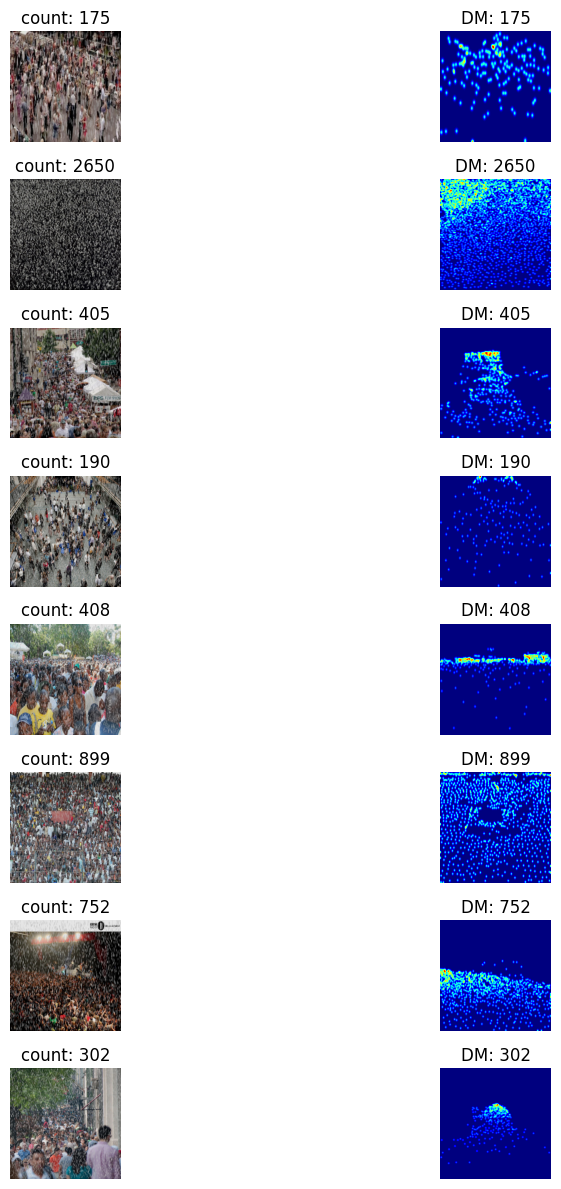

In [38]:
dataiter = iter(train_loader)
ex_images, ex_dmaps, ex_n_people = next(dataiter)


# Show images and density map
plot_corresponding_pairs(ex_images, ex_dmaps,ex_n_people)

# Print Ground truth number of people
#print(' '.join('%5s' % ex_n_people[j].item() for j in range(batch_size)))

# Training Phase

Define a cost function that considering 
* Difference between density map and predicted image
* Difference between sum of predicted image (refering number of people) and the ground truth number of people

In [58]:
import torch
import torch.nn as nn
import torchmetrics.functional as tmf

class CombinedLoss(nn.Module):
    def __init__(self, weight_dmap=0.8, weight_sum_gt=0.2, max_pixel_value=1.0):
        super().__init__()
        self.weight_dmap = weight_dmap
        self.weight_sum_gt = weight_sum_gt
        self.img_loss = nn.MSELoss()
        self.gt_loss_mse = nn.MSELoss()
        self.gt_loss_mae = nn.L1Loss()
        self.max_pixel_value = max_pixel_value  # Maximum pixel value for PSNR

    def forward(self, logits, batch_dmap, batch_gts):
        batch_gts = batch_gts.float()

        # Calculate individual losses
        img_loss = self.img_loss(logits, batch_dmap)
        gt_loss_mae = self.gt_loss_mae(torch.squeeze(logits.sum(dim=(2, 3))), batch_gts)
        gt_loss_mse = self.gt_loss_mse(torch.squeeze(logits.sum(dim=(2, 3))), batch_gts)
        
        # Combine losses
        combined_loss = self.weight_dmap * img_loss + self.weight_sum_gt * gt_loss_mae

        # Calculate MSE
        mse = torch.mean((logits - batch_dmap) ** 2)

        # Calculate PSNR
        psnr = 10 * torch.log10(self.max_pixel_value ** 2 / mse)
        
        # Calculate SSIM
        # SSIM expects the logits and batch_dmap to have values between 0 and 1 (assuming max_pixel_value = 1.0)
        ssim = tmf.structural_similarity_index_measure(logits, batch_dmap)

        return combined_loss, gt_loss_mae, gt_loss_mse, psnr, ssim


In [61]:
import torch
import torch.optim as optim
import numpy as np

num_epochs = 50
train_losses = []
val_losses = []
train_mae_losses = []
val_mae_losses = []
train_mses = []  # To store training MSE
val_mses = []  # To store validation MSE
train_psnrs = []  # To store training PSNR
val_psnrs = []  # To store validation PSNR
train_ssims = []  # To store training SSIM
val_ssims = []  # To store validation SSIM

model = MC_CNN().to(device)
criterion = CombinedLoss(0.8, 0.2)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
best_val_loss = np.inf
best_nr_epoch = 0

for epoch in range(num_epochs):
    print("Epoch {}:".format(epoch))

    # Training phase
    tr_loss_acc = 0.0
    tr_loss_mae_acc = 0.0
    tr_mse_acc = 0.0  # To accumulate MSE
    tr_psnr_acc = 0.0  # To accumulate PSNR
    tr_ssim_acc = 0.0  # To accumulate SSIM

    for batch_img, batch_dmap, batch_gts in train_loader:
        # Put data on device
        batch_img, batch_dmap, batch_gts = batch_img.to(device), batch_dmap.to(device), batch_gts.to(device)
        
        # Predict and get loss
        logits = model(batch_img)
        loss, mae_loss, mse_loss, psnr, ssim = criterion(logits, batch_dmap, batch_gts)  # Updated to get MSE, PSNR, and SSIM
        
        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Keep running statistics
        tr_loss_acc += loss.item()
        tr_loss_mae_acc += mae_loss.item()
        tr_mse_acc += mse_loss.item()  # Accumulate MSE
        tr_psnr_acc += psnr.item()  # Accumulate PSNR
        tr_ssim_acc += ssim.item()  # Accumulate SSIM

    # Calculate average loss, MAE, MSE, PSNR, and SSIM for the training phase
    tr_loss = tr_loss_acc / len(train_loader.dataset)
    tr_mae = tr_loss_mae_acc / len(train_loader.dataset)
    tr_mse = tr_mse_acc / len(train_loader.dataset)  # Average MSE
    tr_psnr = tr_psnr_acc / len(train_loader)  # Average PSNR
    tr_ssim = tr_ssim_acc / len(train_loader)  # Average SSIM

    print('>> TRAIN: Epoch {} | tr_loss: {:.6f} | mae: {:.6f} | mse: {:.6f} | psnr: {:.6f} | ssim: {:.6f}'.format(epoch, tr_loss, tr_mae, tr_mse, tr_psnr, tr_ssim))

    # Validation phase
    with torch.inference_mode():
        val_loss_acc = 0.0
        val_loss_mae_acc = 0.0
        val_mse_acc = 0.0  # To accumulate MSE for validation
        val_psnr_acc = 0.0  # To accumulate PSNR for validation
        val_ssim_acc = 0.0  # To accumulate SSIM for validation

        for batch_img_val, batch_dmap_val, batch_gts_val in val_loader:
            # Put data on device
            batch_img_val, batch_dmap_val, batch_gts_val = batch_img_val.to(device), batch_dmap_val.to(device), batch_gts_val.to(device)

            # Predict and get loss
            logits = model(batch_img_val)
            loss, mae_loss, mse_loss, psnr, ssim = criterion(logits, batch_dmap_val, batch_gts_val)  # Updated to get MSE, PSNR, and SSIM

            # Keep running statistics
            val_loss_acc += loss.item()
            val_loss_mae_acc += mae_loss.item()
            val_mse_acc += mse_loss.item()  # Accumulate MSE
            val_psnr_acc += psnr.item()  # Accumulate PSNR
            val_ssim_acc += ssim.item()  # Accumulate SSIM

    # Calculate average loss, MAE, MSE, PSNR, and SSIM for the validation phase
    val_loss = val_loss_acc / len(val_loader.dataset)
    val_mae = val_loss_mae_acc / len(val_loader.dataset)
    val_mse = val_mse_acc / len(val_loader.dataset)  # Average MSE
    val_psnr = val_psnr_acc / len(val_loader)  # Average PSNR
    val_ssim = val_ssim_acc / len(val_loader)  # Average SSIM

    print('>> VAL:   Epoch {} | val_loss: {:.6f} | mae: {:.6f} | mse: {:.6f} | psnr: {:.6f} | ssim: {:.6f}'.format(epoch, val_loss, val_mae, val_mse, val_psnr, val_ssim))

    # Save the best model based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_nr_epoch = epoch
        torch.save(model.state_dict(), './crowd_counting.pth')

    # Append statistics for later analysis
    train_losses.append(tr_loss)
    train_mae_losses.append(tr_mae)
    train_mses.append(tr_mse)  # Append training MSE
    train_psnrs.append(tr_psnr)  # Append training PSNR
    train_ssims.append(tr_ssim)  # Append training SSIM
    val_losses.append(val_loss)
    val_mae_losses.append(val_mae)
    val_mses.append(val_mse)  # Append validation MSE
    val_psnrs.append(val_psnr)  # Append validation PSNR
    val_ssims.append(val_ssim)  # Append validation SSIM

print('Best training MAE: ', train_mae_losses[best_nr_epoch])  
print('Best validation MAE: ', val_mae_losses[best_nr_epoch])  
print('Best training MSE: ', train_mses[best_nr_epoch])
print('Best validation MSE: ', val_mses[best_nr_epoch])
print('Best training PSNR: ', train_psnrs[best_nr_epoch])
print('Best validation PSNR: ', val_psnrs[best_nr_epoch])
print('Best training SSIM: ', train_ssims[best_nr_epoch])
print('Best validation SSIM: ', val_ssims[best_nr_epoch])


Epoch 0:
>> TRAIN: Epoch 0 | tr_loss: 591.382626 | mae: 2956.797736 | mse: 69997201.185185 | psnr: 6.433309 | ssim: 0.014660
>> VAL:   Epoch 0 | val_loss: 574.530208 | mae: 2872.547786 | mse: 62181402.666667 | psnr: 7.136660 | ssim: 0.013890
Epoch 1:
>> TRAIN: Epoch 1 | tr_loss: 500.467838 | mae: 2502.256069 | mse: 50143366.400000 | psnr: 7.845566 | ssim: 0.021249
>> VAL:   Epoch 1 | val_loss: 487.137207 | mae: 2435.611523 | mse: 44752913.066667 | psnr: 8.549340 | ssim: 0.017183
Epoch 2:
>> TRAIN: Epoch 2 | tr_loss: 415.314197 | mae: 2076.513343 | mse: 34633284.562963 | psnr: 9.446454 | ssim: 0.026899
>> VAL:   Epoch 2 | val_loss: 396.500643 | mae: 1982.453906 | mse: 29645361.066667 | psnr: 10.340351 | ssim: 0.020188
Epoch 3:
>> TRAIN: Epoch 3 | tr_loss: 329.159525 | mae: 1645.761263 | mse: 21809819.614815 | psnr: 11.468897 | ssim: 0.028393
>> VAL:   Epoch 3 | val_loss: 305.306445 | mae: 1526.502930 | mse: 17572602.933333 | psnr: 12.601867 | ssim: 0.018981
Epoch 4:
>> TRAIN: Epoch 4 | 

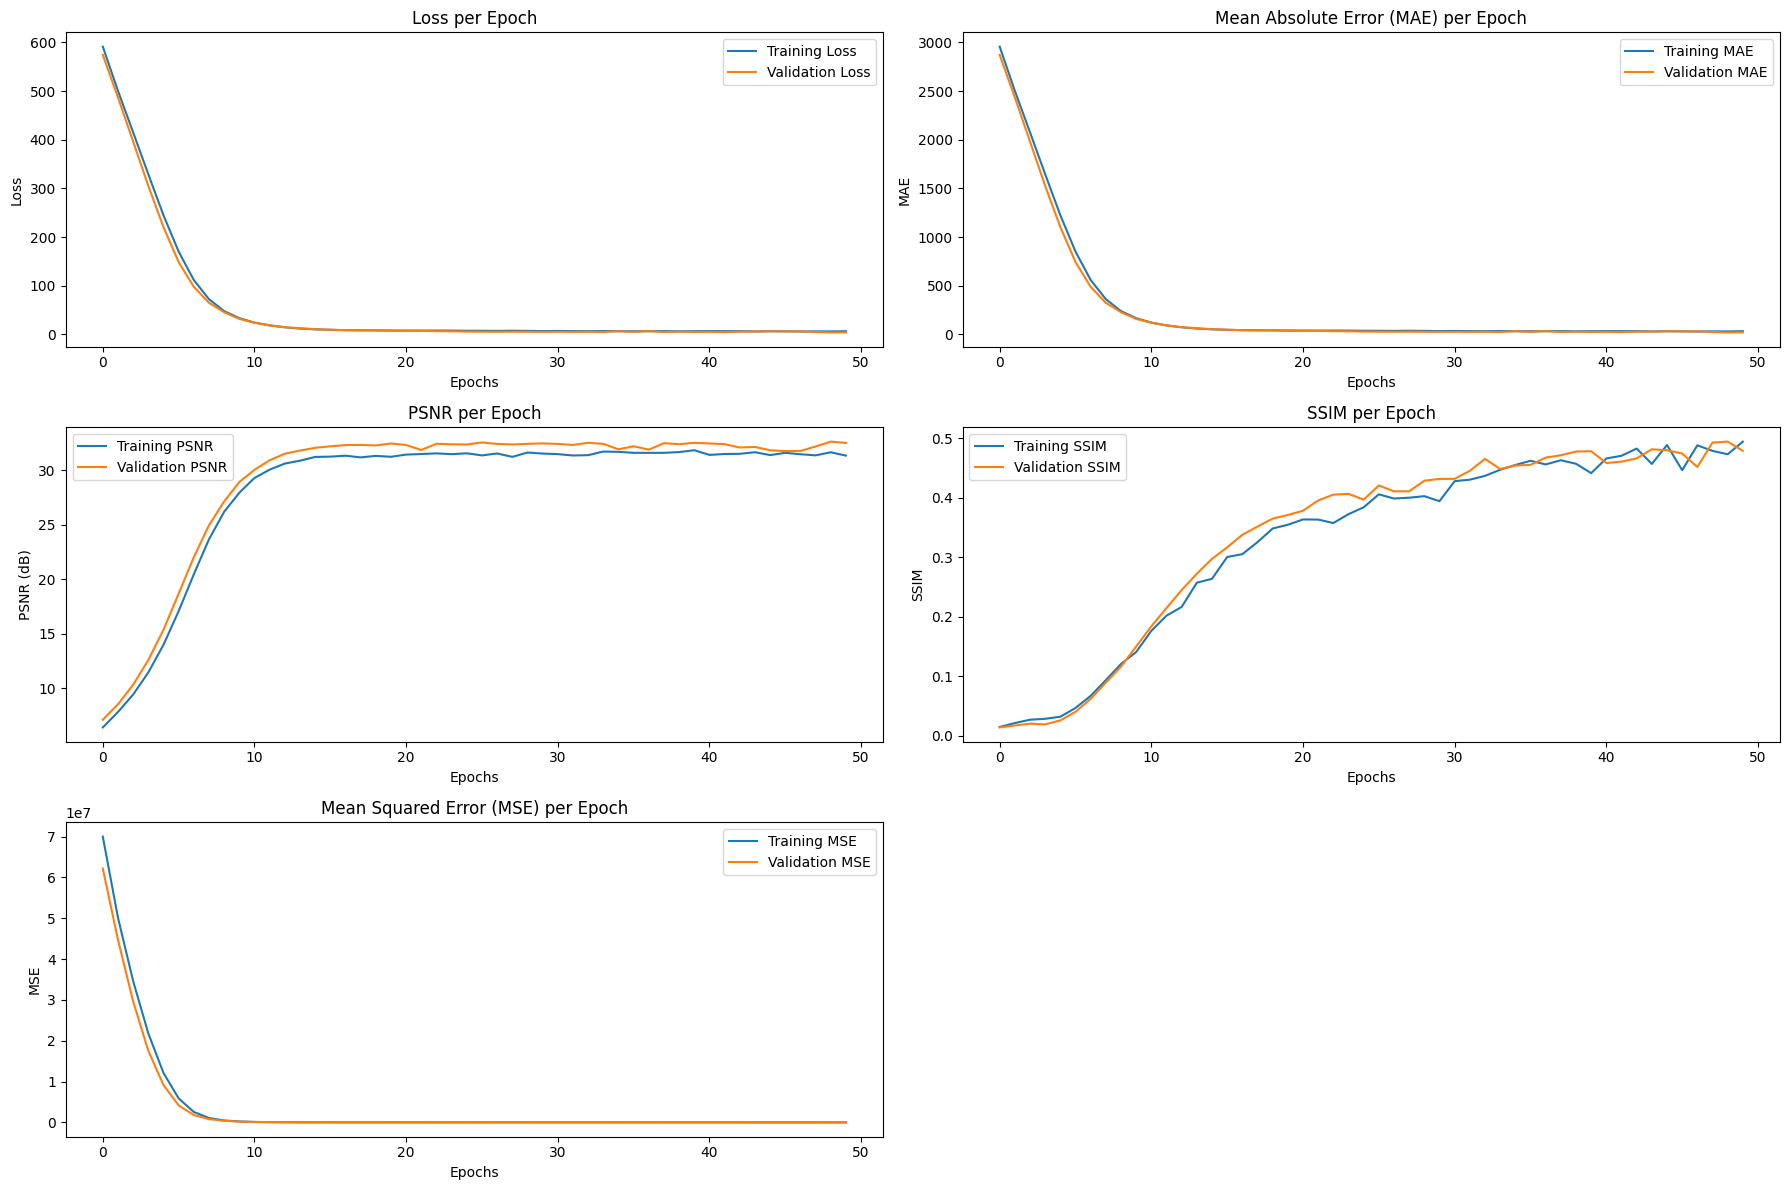

In [62]:
import matplotlib.pyplot as plt

# Assuming you have `train_mse_losses` and `val_mse_losses` lists to store the MSE values.
plt.figure(figsize=(18, 12))  # Adjusted the figure height to fit the extra plot.

# Plotting Loss
plt.subplot(3, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting MAE
plt.subplot(3, 2, 2)
plt.plot(train_mae_losses, label='Training MAE')
plt.plot(val_mae_losses, label='Validation MAE')
plt.title('Mean Absolute Error (MAE) per Epoch')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend()

# Plotting PSNR
plt.subplot(3, 2, 3)
plt.plot(train_psnrs, label='Training PSNR')
plt.plot(val_psnrs, label='Validation PSNR')
plt.title('PSNR per Epoch')
plt.ylabel('PSNR (dB)')
plt.xlabel('Epochs')
plt.legend()

# Plotting SSIM
plt.subplot(3, 2, 4)
plt.plot(train_ssims, label='Training SSIM')
plt.plot(val_ssims, label='Validation SSIM')
plt.title('SSIM per Epoch')
plt.ylabel('SSIM')
plt.xlabel('Epochs')
plt.legend()

# Plotting MSE
plt.subplot(3, 2, 5)
plt.plot(train_mses, label='Training MSE')
plt.plot(val_mses, label='Validation MSE')
plt.title('Mean Squared Error (MSE) per Epoch')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


<ipython-input-63-4872301711d0>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('./crowd_counting.pth'))


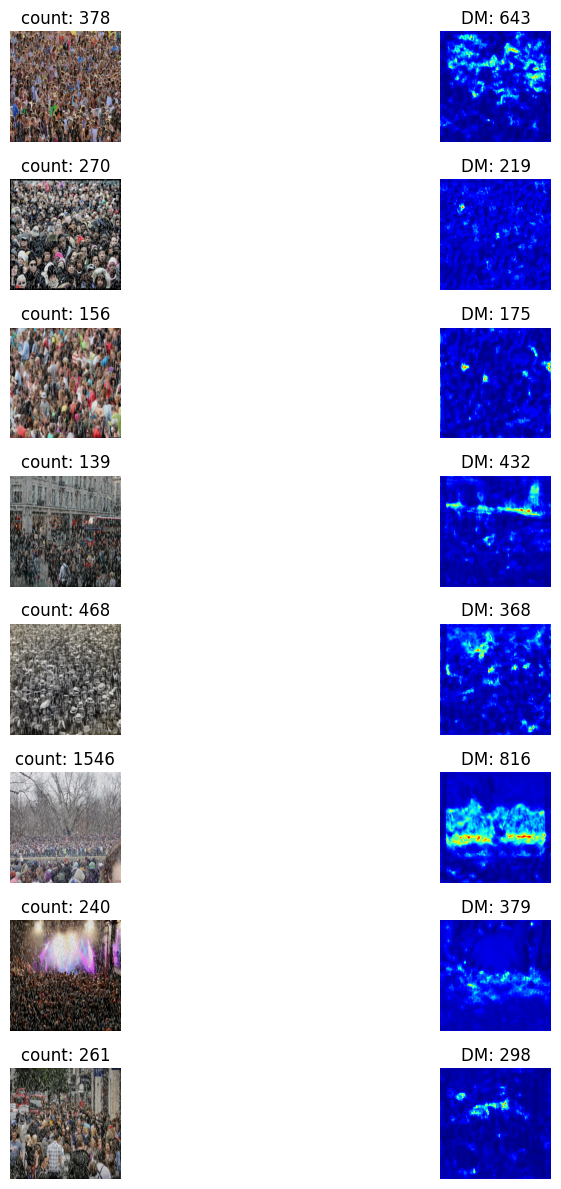

In [63]:
best_model = MC_CNN().to(device)
best_model.load_state_dict(torch.load('./crowd_counting.pth'))
# Get some random validation images
dataiter = iter(val_loader)
ex_images, _, ex_gts  = next(dataiter)


# Show images and density map

pred_dms = best_model(ex_images.to(device))
plot_corresponding_pairs(ex_images.cpu(), pred_dms.cpu(),ex_gts )


# Test Phase

In [64]:
import torch
from torchmetrics.functional import peak_signal_noise_ratio as psnr
from torchmetrics.functional import structural_similarity_index_measure as ssim
import torch.nn as nn

best_model = MC_CNN().to(device)
best_model.load_state_dict(torch.load('./crowd_counting.pth'))

test_loss_acc = 0.0  # Accumulator for MAE
test_mse_acc = 0.0   # Accumulator for MSE
test_psnr_acc = 0.0  # Accumulator for PSNR
test_ssim_acc = 0.0  # Accumulator for SSIM

# Define both MAE and MSE losses
mae_criterion = nn.L1Loss()
mse_criterion = nn.MSELoss()

with torch.inference_mode():
    for batch_img, batch_dmap, batch_gts in test_loader:
        batch_img, batch_dmap, batch_gts = batch_img.to(device), batch_dmap.to(device), batch_gts.to(device)

        # Forward pass
        logits = best_model(batch_img)
        pred_dmap = logits  # Predicted density map

        # Loss (MAE and MSE)
        mae_loss = mae_criterion(torch.squeeze(logits.sum(dim=(2, 3))), batch_gts)
        mse_loss = mse_criterion(torch.squeeze(logits.sum(dim=(2, 3))), batch_gts)
        test_loss_acc += mae_loss.item()
        test_mse_acc += mse_loss.item()

        # PSNR and SSIM
        for i in range(batch_dmap.size(0)):  # Iterate over batch
            pred_map = pred_dmap[i].unsqueeze(0)  # Predicted density map for one image
            true_map = batch_dmap[i].unsqueeze(0)  # Ground truth density map for one image

            # PSNR: Compare predicted and ground truth density maps
            psnr_val = psnr(pred_map, true_map)
            test_psnr_acc += psnr_val.item()

            # SSIM: Compare predicted and ground truth density maps
            ssim_val = ssim(pred_map, true_map)
            test_ssim_acc += ssim_val.item()

# Calculate averages
test_mae = test_loss_acc / len(test_loader.dataset)
test_mse = test_mse_acc / len(test_loader.dataset)
test_psnr = test_psnr_acc / len(test_loader.dataset)
test_ssim = test_ssim_acc / len(test_loader.dataset)

# Print results
print('TEST: MAE: {:.3f} | MSE: {:.3f} | PSNR: {:.3f} | SSIM: {:.3f}'.format(test_mae, test_mse, test_psnr, test_ssim))


<ipython-input-64-6839e63416d3>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('./crowd_counting.pth'))


TEST: MAE: 22.584 | MSE: 9169.805 | PSNR: 18.832 | SSIM: 0.178


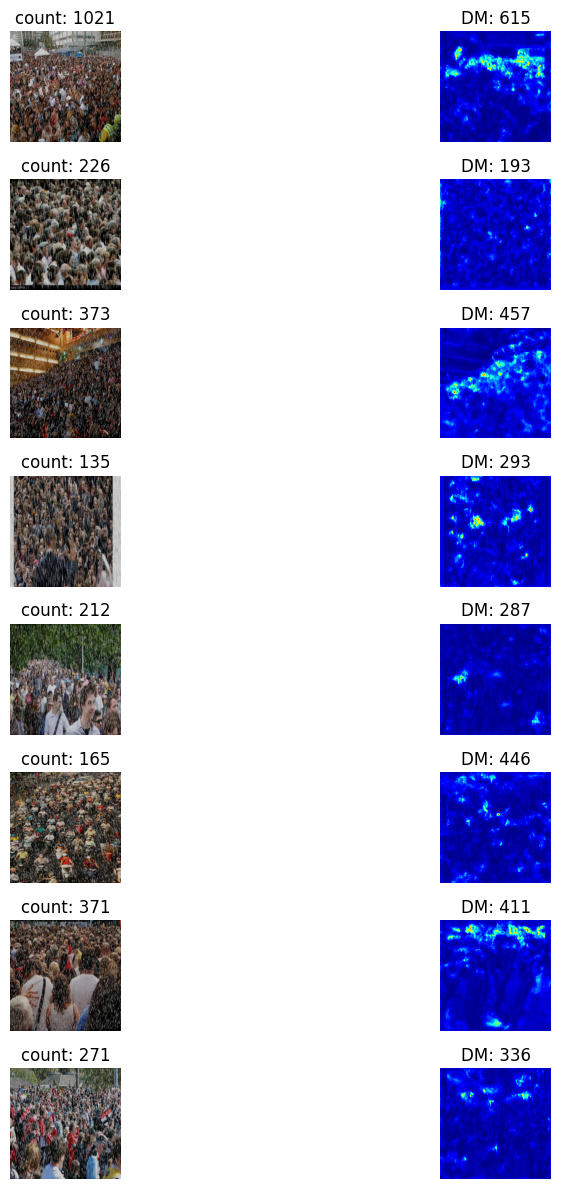

In [66]:
# Get some random validation images
dataiter = iter(test_loader)
ex_images, _, ex_gts  = next(dataiter)


# Show images and density map

pred_dms = best_model(ex_images.to(device))
plot_corresponding_pairs(ex_images.cpu(), pred_dms.cpu(), ex_gts)

# Print labels
#print(' '.join('%5s' % ex_gts[j].item() for j in range(batch_size)))